# <b> <span style='color:#0386f7de'>|</span> Abstract</b>

### The objective of this Notebook is to predict `HeartDisease` using all the Personal Key Indicators of the Human Beings with HeartDisease information by performing Data Exploration, Data Cleaning, Data preprocessing, Feature Engineering, Model Building, Interpreting the best model using SHAP and Build a Heart Disease Application using the best model we develop.

* Dataset: Personal key Indicators of HeartDisease.
* Dataset has 319795 observations and 18 features [14 Categorical features and 4 Continuous Features] with just 27,373 (8.5%) HeartDisease (Target) observations.

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`,  `SleepTime`



# <b>1 <span style='color:#0386f7de'>|</span> Importing libraries</b>
- **For ML Models**: sklearn 
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn, plotly

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 900 kB/s 


In [ ]:
# Importing Required Libraries
# Install Numpy, Pandas, Matplotlib, Seaborn, Plotly, Category_encoders

# For Data Manipulation
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For Data Preprocessing
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split 

# For ML models
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

# <b>2 <span style='color:#0386f7de'>|</span> About the Dataset</b>

In [ ]:
# Dataset Link
data_githublink = "https://github.com/jkkn31/KrishnakanthNaik/blob/main/heart_2020_cleaned.csv"

# Transforming above link to access data from above provided github link
data_githublink= data_githublink.replace("blob/", "").replace("github.com","raw.githubusercontent.com")
data_githublink

# Importing the data from github into dataframe
raw_df = pd.read_csv(data_githublink)
df = raw_df.copy()

df.rename(columns={'BMI':'BMI_value'}, inplace=True)
print(f"Dataset has {df.shape[0]} observations with {df.shape[1]} variables.")
print(f"Target Distribution --> \n{100*df.HeartDisease.value_counts(normalize=True)}")
df.head()

Dataset has 319795 observations with 18 variables.
Target Distribution --> 
No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64


,HeartDisease,BMI_value,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Dataset has `319795` observations and `18` features [14 Categorical features and 4 Continuous Features] with just `27,373 (8.5%) HeartDisease (Target) observations`.


## Column Descriptions
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: 13-categories of age. [ '18-24',  '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

In [ ]:
# checking the details (missing values, dtypes) of all the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI_value         319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Dataset has `18` features [14 Categorical features and 4 Continuous Features] with just `27,373 (8.5%) HeartDisease (Target) observations`.

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`,  `SleepTime`

In [ ]:
# Checking Missing/null values in the dataset.
df.isnull().sum()

HeartDisease        0
BMI_value           0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


* There are `no missing values` in the dataset, so Imputation methods are not required.

# <b>3 <span style='color:#0386f7de'>|</span> Univariate Analysis</b>

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`,  `SleepTime`

## <b>3.1 <span style='color:#0386f7de'>|</span> Continuous Feature Analysis:</b>

Continuous Features:  
`BMI`, `PhysicalHealtH`, `MentalHealth`,  `SleepTime`

In [ ]:
# Listing numerical and categorical features from our dataset.
numerical_feats = df.select_dtypes(include='number').columns.tolist()
categorical_feats = df.select_dtypes(include='object').columns.tolist()

### Descriptive Statistics of the Dataset

In [ ]:
df.describe()

,BMI_value,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### About Numerical Features:
1. `BMI` - Average BMI (Body Mass Index) of this dataset is 28.33 and most of the data is distributed between 12.02 to 31.42 with a maximum value of 94.85. There seems to be potentinal outlier in the dataset which we can investigate later in the notebook.
2. `PhysicalHealth` and `MentalHealth` are following same distribution with small proportion of data in 1st and 2nd quantiles. Most of the people are not well for hardly 2 to 3 days but a portion of people are suffering from so many days.
3. `Sleep Time [Average Sleep Time]` - As expected, the Average sleep time is around 7 hours with minimum of 1 hour and maximum of 24 hours which is shocking, definitely this is a data issue as no one can sleep for 1 hour or 24 hours on average per day.

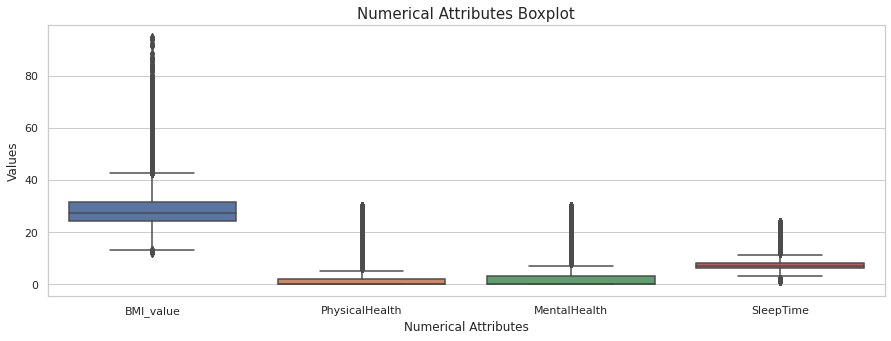

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

### It is very evident from above box plot that all the numerical features has outliers and as the scales are different for each feature, it is hard to visualize them here. Lets normalize them later in this notebook during data transformation.

In [ ]:
# defining my own functions to plot required charts as well as to identify the outliers

def get_quantile_limits_for_outliers(df, feature,factor):
    Q1 = df[f"{feature}"].quantile(0.25)
    Q3 = df[f"{feature}"].quantile(0.75)
    IQR=Q3-Q1
    print(f"{feature} - Quantile information\n")
    print("First Quartile: ",Q1)
    print("Third Quartile: ",Q3)
    print("Interquartile: ",IQR)
    lower_limit=Q1-factor*IQR
    upper_limit=Q3+factor*IQR
    if((lower_limit < 0) &( df[f"{feature}"].quantile(0)>=0)):
        print("Adjusted the Limits as the lower limit is less than Zero!")
        upper_limit = upper_limit - lower_limit 
        lower_limit = 0
        
    print("Lower Limit: ",lower_limit)
    print("Upper Limi: ",upper_limit)
    outliers_records = df[(df.SleepTime <  lower_limit) | (df.SleepTime > upper_limit)].shape[0]
    total_records = df.shape[0]
    per_outliers = (100*(outliers_records/total_records))
    print(f"% outliers in {feature} --> {per_outliers} ")
    
# Defining few user defined functions to plot required charts.
import statistics

def plot_kde(feature, df_numerical):
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.kdeplot(df_numerical.loc[(df_numerical['HeartDisease']=='Yes'), feature], color='g', shade=True, label='Yes')
    sns.kdeplot(df_numerical.loc[(df_numerical['HeartDisease']=='No'), feature],  shade=True, label='No')
    plt.title(f'{feature} with Heart Disease')
    plt.legend(title='HeartDisease?', fontsize=15, title_fontsize=15)
    
    plt.show()

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8))
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='black')
    ax[0].axvline(x = df[feature].mean(), color = 'blue', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'red', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'green', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='yellow')
    
    plt.show()
    
def plot_box_num(feature):
    fig = plt.subplots(figsize=(14, 4))
    sns.boxplot(x = df[feature],color='orange')
    plt.show()
    
# Defining few functions to plot distributions for categorical feature
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_cat_dist_with_target(df, feature):
    df['Target'] = df.HeartDisease.map({'Yes':1, 'No':0})
    x = df.pivot_table(index=f'{feature}', columns='HeartDisease', values='Target', aggfunc=['count'])
    x.columns = ['_'.join(col) for col in x.columns.values]
    x = x.reset_index()
    x['total'] = x[['count_No', 'count_Yes']].sum(axis=1)
    x["% HeartDisease"] = (100*x['count_Yes']/x['total']).round(2)
    x["% DataDist"] = (100*x['total']/x['total'].sum()).round(2)
    df = x.sort_values(f"{feature}", ascending=True).reset_index(drop=True)
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
        go.Scatter(x=df[f'{feature}'], y=df["% HeartDisease"], name="% Suffered with Heart Disease", mode="lines"),
        secondary_y=True
    )

    fig.add_trace(
        go.Bar(x=df[f'{feature}'], y= df["% DataDist"], name=f"% Frequency of {feature}"),
        secondary_y=False
    )

    fig.update_xaxes(title_text=f"{feature}")

    # Set y-axes titles
    fig.update_yaxes(title_text=f"% Frequency of {feature}", secondary_y=False)
    fig.update_yaxes(title_text="% Suffered with Heart Disease", secondary_y=True)
#     fig['layout'].update(height=300, width=20000, title='Subplots with Shared X-Axes')
    fig.update_layout(height=450, width=950, title_text=f"{feature} - Distribution with HeartDisease Trace")
    fig.show()
    df.head()

def plot_kde(feature, df_categorical):
    plt.subplots(1, 1, figsize=(15, 5))
    sns.histplot(data=df_categorical, x=feature, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
    plt.title(f'{feature} with Heart Disease')
    plt.show()
    
def plot_cat_feat(feat, df):
    ax = plt.figure(figsize=(18,6))
    ax = plt.subplot(1,2,1)
    ax = sns.countplot(x=f'{feat}', data=df)
    ax.bar_label(ax.containers[0])
    plt.title(f"{feat}", fontsize=20,color='Black',font='Times New Roman')
    ax =plt.subplot(1,2,2)
    ax=df[f'{feat}'].value_counts().plot.pie(autopct='%1.2f%%');
    ax.set_title(label = f"{feat}", fontsize = 20,color='Black',font='Times New Roman');
    
    
# for i in range(1, len(binary_cols)):
def plot_pie_for_binary_categorical(df, feature):
    fig = plt.figure(figsize=(18,6), dpi=90)
    
    # Plot distribution of adults with heart disease
    ax1 = plt.subplot(1,2,1)
    df[df['HeartDisease'] == 'Yes'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie', autopct='%.1f%%', labeldistance=None,
                                                                                        wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white', 'width':1.0 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With heart disease")
    
    # Plot distribution of adults without heart disease
    ax2 = plt.subplot(1,2,2)
    df[df['HeartDisease'] == 'No'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie',   autopct='%.1f%%', labeldistance=None,
                                                                                     wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white', 'width':1.0 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without heart disease")
    plt.suptitle(f"{binary_cols[i]} - Patient with/without Heart Disease distribution by " + binary_cols[i] + " status", fontweight='bold')
    
    handles, labels = ax1.get_legend_handles_labels()

        
    leg = fig.legend(handles, labels, loc = 'upper right', fancybox=False)

        
    plt.subplots_adjust(right=0.9)
    plt.show()

In [ ]:
get_quantile_limits_for_outliers(df, 'BMI_value', 1.5)

BMI_value - Quantile information

First Quartile:  24.03
Third Quartile:  31.42
Interquartile:  7.390000000000001
Lower Limit:  12.945
Upper Limi:  42.505
% outliers in BMI_value --> 99.68761237667881 


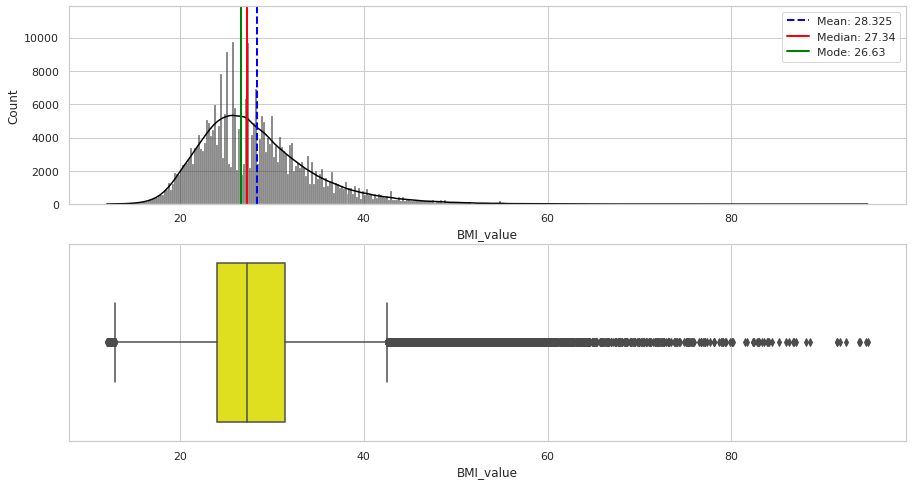

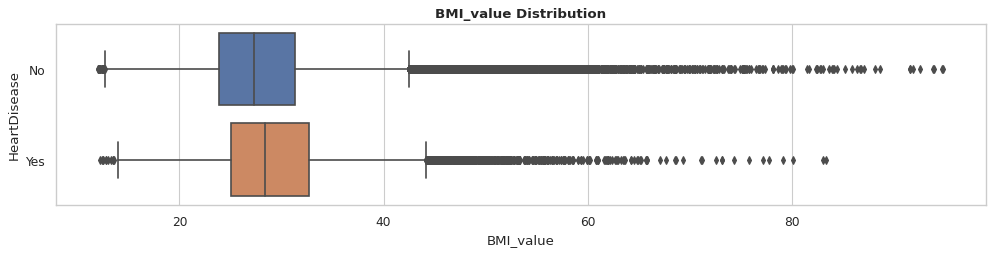

In [ ]:
feature = 'BMI_value'
plot_hist(feature)
plt.figure(figsize=(15,3),dpi=80)
sns.boxplot(x= df[feature], y=df['HeartDisease'], data=df, orient="h")
plt.title(f"{feature} Distribution", fontweight='bold')
plt.show()

## BMI:
* As expected, BMI has very large outliers and most of the data is distributed between 10 to 40. 
* BMI follows normal distribution but skewed towards right as it has outliers and it is positively skewed as the Mean (28.32) > Median (27.34)
* While the boxplots show there are no significant differences between adults with and without heart disease in BMI. so, BMI is not making sense as even though the BMI is very extreme, few people are not diagonosed with Heart Disease. Lets create BMI class and verify it in later in this notebook.


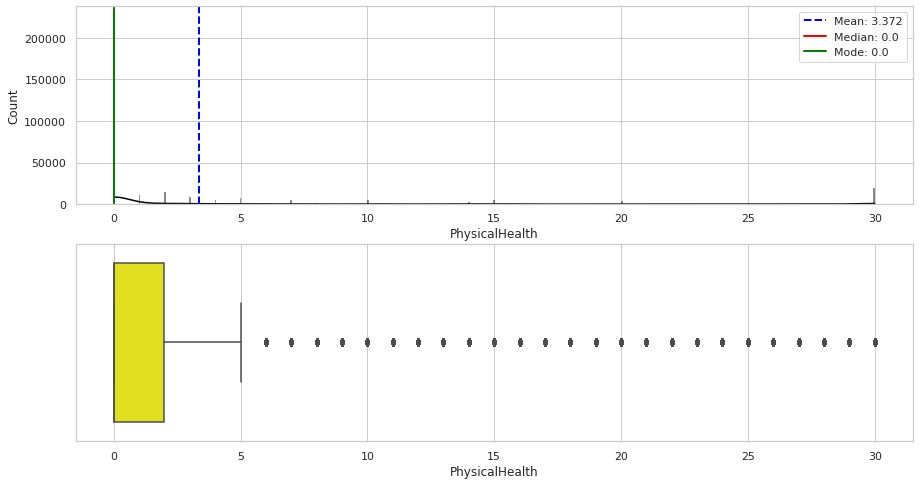

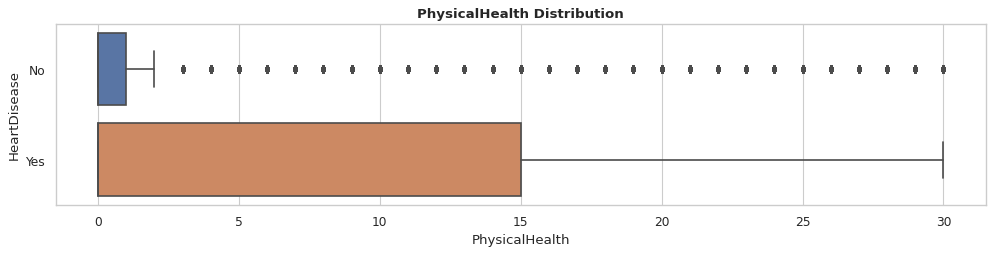

In [ ]:
feature = 'PhysicalHealth'
plot_hist(feature)
plt.figure(figsize=(15,3),dpi=80)
sns.boxplot(x= df[feature], y=df['HeartDisease'], data=df, orient="h")
plt.title(f"{feature} Distribution", fontweight='bold')
plt.show()

# plot_kde(feature, df)

## PhysicalHealth:
* PhysicalHealth also has very large outliers and most of the data (75%) is distributed between 0 to 2 days and it is really to visualize the complete data, so lets handle outliers and normalize this later in this notebook.
* While the boxplots show there are ``significant`` differences between adults with and without heart disease in PhysicalHealth. 
* People who are physically not healthy/well for long days has high probability of getting HeartDisease.
* The distinct distribution in physical health between these evaluated groups, further correlation analysis will be conducted later to evaluate the relationship of heart disease and PhysicalHealth.

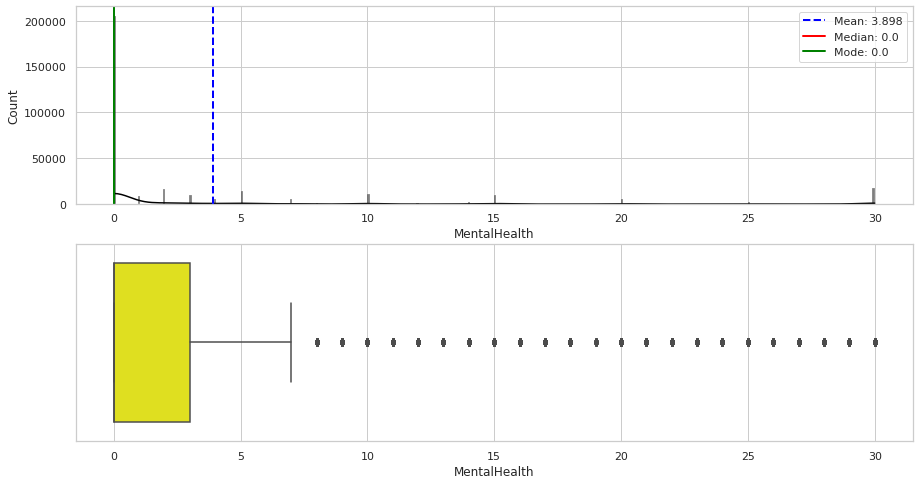

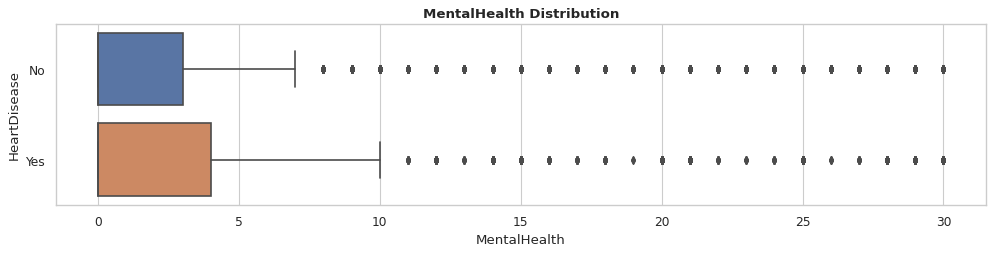

In [ ]:
feature = 'MentalHealth'
plot_hist(feature)
plt.figure(figsize=(15,3),dpi=80)
sns.boxplot(x= df[feature], y=df['HeartDisease'], data=df, orient="h")
plt.title(f"{feature} Distribution", fontweight='bold')
plt.show()
# plot_kde(feature, df)

## MentalHealth:
* `MentalHealth` following same distribution as `PhysicalHealth` and has outliers and most of the data (75%) is distributed between 0 to 3  days. This seems like people who are suffering from physically illness are also suffering from Mental illness. 
* While the boxplots show there are ``NO Significant`` differences between adults with and without heart disease in MentalHealth. 
* Lets handle outliers and normalize to draw further insights.

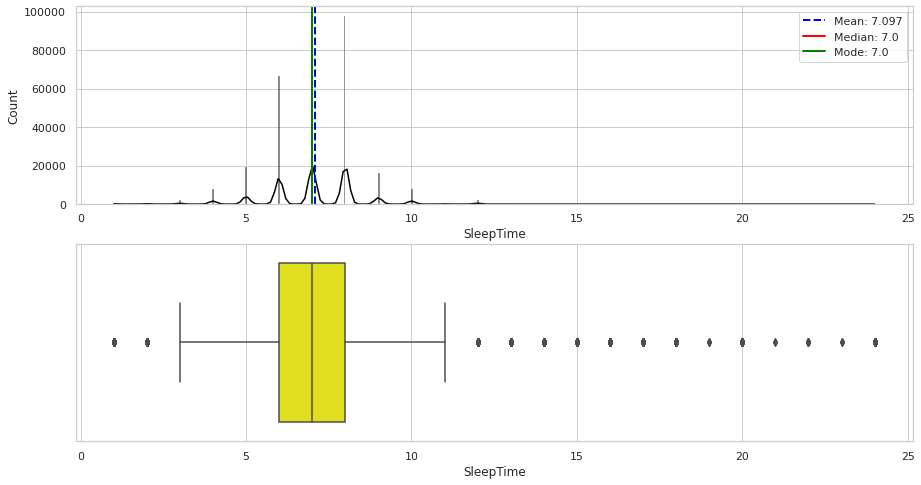

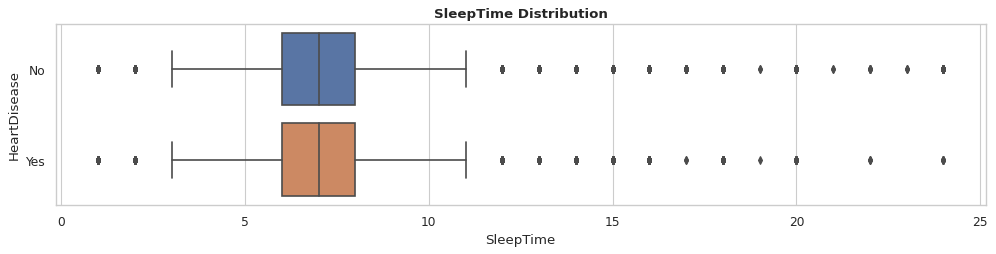

In [ ]:
feature = 'SleepTime'
plot_hist(feature)
plt.figure(figsize=(15,3),dpi=80)
sns.boxplot(x= df[feature], y=df['HeartDisease'], data=df, orient="h")
plt.title(f"{feature} Distribution", fontweight='bold')
plt.show()
# plot_kde(feature, df)

## SleepTime:
* SleepTime has outliers and most (75%) of the data is distributed between 1 to 8 hours with an average sleep time of 7.1 hours. 
* While the boxplots show there are `No Significant` differences between adults with and without heart disease in SleepTime.
* Distribution shows minimum of 1 hour and maximum of 24 hours which is shocking, definitely this is a data issue as no one can sleep for 1 hour or 24 hours on average per day.

### What are the likely distributions of the numeric variables?
* All the Numeric features (PhysicalHelath, MentalHealth, BMI, SleepTime) - are following Normal distributions but every feature has extreme outliers so all the distribution are SKEWED.

### Outlier Handling: 

#### 1. Standard Deviation Method:

* Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. If a dataset approximately follows normal distribution then around 68% of the data lies in 1 standard deviation from the mean, Similarly ~95% of the data lies in 2 standard deviations from the mean and ~99.7% of the data lies in 3 standard deviations from the mean.

#### 2. Inter Quantile Range Method:
* IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
* Q1 (1st Quantile) = df.quantile(0.25)
* Q3 (3rd Quantile)= df.quantile(0.75)
* IQR = Q3-Q1
* LowerLimit = Q1-1.5*IQR
* UpperLimit = Q3+1.5*IQR

why we use 1.5 as a factor --> as Standard Devaiation method, 1 IQR from Q1 & Q2 covers around ~70% of the data and 2 IQR covers around ~ 97% of the data, so bigger scale will lead to consider outliers as a data point and a smaller scale will lead to percieve some of the datapoints has outliers. so it is aproximated that 1.5 factor will cover around ~95% of the data.

Anything outside the`LowerLimit` and `UpperLimit` are can be replaced with Median or Mean or Mode.

In [ ]:
raw_df1 = df.copy()

In [ ]:
df= raw_df1.copy()

In [ ]:
# Lets divide BMI into Class based on below limits for each class.
def BMI_Classification(BMI):
    if(BMI < 18.5): return 'UnderWeight'
    elif(18.5 <= BMI <= 25): return 'NormalWeight'
    elif(25 <= BMI <= 30): return 'OverWeight'
    elif(30 <= BMI <= 35): return 'Obesity Class I'
    elif(35 <= BMI <= 40): return 'Obesity Class II'
    elif(40 <= BMI): return 'Obesity Class III'
    else: return None
    
from pandas.api.types import CategoricalDtype

df['BMI'] = df['BMI_value'].apply(lambda x: BMI_Classification(x))

list_ordering = ["UnderWeight", 'NormalWeight', 'OverWeight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']  
order_type = CategoricalDtype(categories=list_ordering, ordered=True)
df["BMI"] = df["BMI"].astype(order_type)   
df.head()

,HeartDisease,BMI_value,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,UnderWeight
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NormalWeight
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,OverWeight
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,NormalWeight
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NormalWeight


In [ ]:
plot_cat_dist_with_target(df, 'BMI')

#### Now BMI Class makes more sense and relatable than using BMI actual values, so lets drop BMI_value feature and use this class BMI
* Except NormalWeight, all other classes are prone to HeartDisease depending on the level of class they belong to which seems more realistic

In [ ]:
df = df.drop('BMI_value', axis=1)

In [ ]:
df.quantile(0.25)

PhysicalHealth    0.0
MentalHealth      0.0
SleepTime         6.0
Target            0.0
Name: 0.25, dtype: float64

In [ ]:
def remove_oultliers_using_quantiles(df, feature,factor):
    Q1 = df[f"{feature}"].quantile(0.25)
    Q3 = df[f"{feature}"].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-factor*IQR
    upper_limit=Q3+factor*IQR
#     print(df[feature].describe())
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
#     print(df[feature].describe())
    return df

In [ ]:
df = remove_oultliers_using_quantiles(df, 'PhysicalHealth', 1.5)
df = remove_oultliers_using_quantiles(df, 'SleepTime', 1.5)
df = remove_oultliers_using_quantiles(df, 'MentalHealth', 1.5)

In [ ]:
numerical_feats = df.select_dtypes(include='number').columns.tolist()
numerical_feats

['PhysicalHealth', 'MentalHealth', 'SleepTime', 'Target']

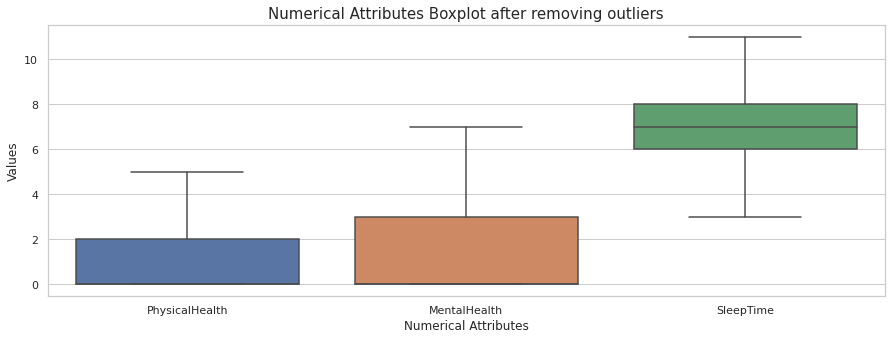

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers", fontsize= 15)
plt.show()

#### After fixing outliers, lets normalize them so that all the features are in same class

In [ ]:
# Using MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_feats[:-1]] = pd.DataFrame(scaler.fit_transform(df[numerical_feats[:-1]].values), columns=numerical_feats[:-1], index=df.index)

In [ ]:
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Target
0,No,Yes,No,No,0.600000,0.556909,No,Female,55-59,White,Yes,Yes,Very good,0.250,Yes,No,Yes,UnderWeight,0
1,No,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,0.500,No,No,No,NormalWeight,0
2,No,Yes,No,No,0.674342,0.556909,No,Male,65-69,White,Yes,Yes,Fair,0.625,Yes,No,No,OverWeight,0
3,No,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,0.375,No,No,Yes,NormalWeight,0
4,No,No,No,No,0.674342,0.000000,Yes,Female,40-44,White,No,Yes,Very good,0.625,No,No,No,NormalWeight,0


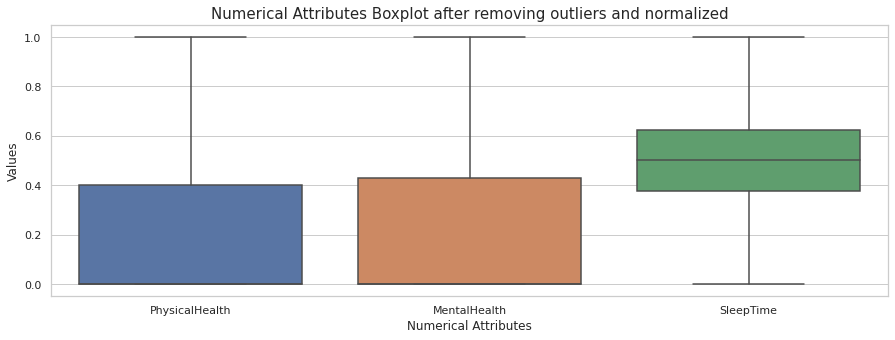

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_feats[:-1]])  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot after removing outliers and normalized", fontsize= 15)
plt.show()

#### Normalization: 
Normalization brings down all the features scales to [0 to 1] as it uses minimum and maximum value in each feature.

Normalization = (X - Xmin) / (Xmax - Xmin).

#### Standardization:
Standardizatoin distributes the data around 1 standard devitaion from its mean of feature, so here all the features will not be in same scale as each features mean will not be same

### Do the ranges of the predictor variables make sense?

* It was very hard to visualize the numerical features with Raw Data when I plotted the Boxplots, as they have extreme otliers and each feature has different scale.
* After Transforming the Data by Handling outliers and normalizing the features to bring down all the features  to same scale, the data distribution of the features makes sense except the BMI_value feature.
* While the boxplots of BMI_value show there are no significant differences between adults with and without heart disease in BMI. so, BMI is not making sense as even though the BMI is very extreme, few people are not diagonosed with Heart Disease. so I have create a BMI class depending on the BMI values and the BMI class distribution is more realastic than BMI_values. [please refer to BMI class Distirbution chart]

* Defined BMI function:
* `def BMI_Classification(BMI):
    if(BMI < 18.5): return 'UnderWeight'
    elif(18.5 <= BMI <= 25): return 'NormalWeight'
    elif(25 <= BMI <= 30): return 'OverWeight'
    elif(30 <= BMI <= 35): return 'Obesity Class I'
    elif(35 <= BMI <= 40): return 'Obesity Class II'
    elif(40 <= BMI): return 'Obesity Class III'
    else: return None`

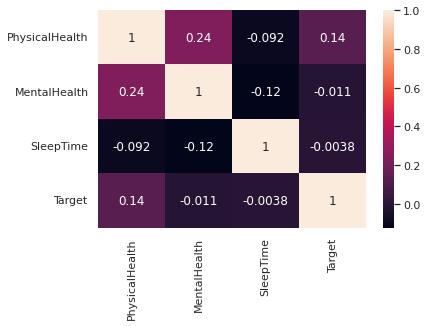

In [ ]:
numerical_feats
sns.heatmap(df[numerical_feats].corr(), annot=True)

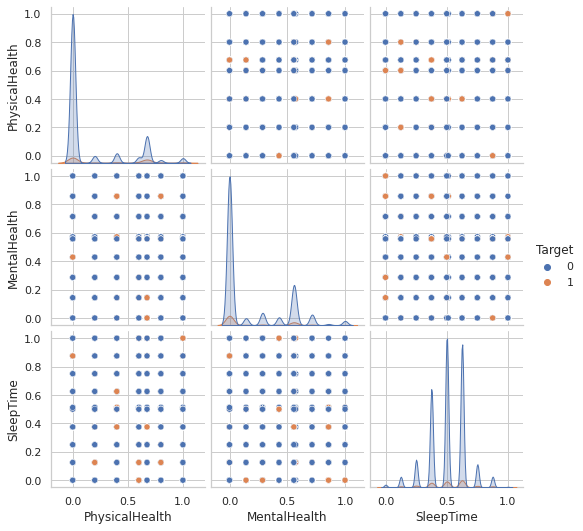

In [ ]:
sns.pairplot(df[numerical_feats], diag_kind='kde',  hue="Target")

#### Correlation among Numerical Features: 
* Correlation matrix shows that `[PhysicalHealth]` have `positive correlation` with `Target`.
* We can see that one of our dataset features [PhysicalHealth] have high positive association with other feature [MentalHealth] compare to other numerical features, but it is not that high. 
* It seems like there is no significant positve/negative correlation among the features and also with the Target

### What I noticed about Numerical Features so far:
* `BMI higher than 25 consider as Overweight`, We can observe that few people who are `OVERWEIGHTED and OBESE` have heart disease and few don't, so we created a new BMI class which was showing realistic plots so wil be using BMI class from now.
* We can also see `Healthy Sleep Hours` can also causes heart disease like the odd cases in BMI (overweighted but don't have heart disease). SleepTime is interesting as whether they follow a `good sleeping habit or not`, `some can and some cannot escape heart disease`.
* PhysicalHealth has positive correlation with Target and a positive correlation with MentalHealth, seems like we have multicollinearity in the dataset, which we can verify with OLS or VIF factor or using some other methods.

## <b>3.2 <span style='color:#0386f7de'>|</span> Categorical Feature Analysis:</b>

Categorical Features:  
`HeartDisease`, `Smoking`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `Sex`, `AgeCategory`, `Race`, `Diabetic`, `PhysicalActivity`, `GenHealth`, `Asthma`, `KidneyDisease`, `SkinCancer`

In [ ]:
# Listing down features with binary values and multiple values.
ordinal_feat = []
binary_feat = []

[ ordinal_feat.append(i) for i in categorical_feats if df[i].nunique()>2]
[ binary_feat.append(i) for i in categorical_feats if df[i].nunique()<=2]
binary_feat, ordinal_feat
print(f"Features which has only 2 distinct values: \n{binary_feat}\n")
print(f"Features which has more than 2 distinct values: \n{ordinal_feat}")

for col in ordinal_feat:
    print(f"\n{col} --> { df[col].unique()}")
    
# Ordering the General Health classes    
list_ordering = ["Poor", 'Fair', 'Good', 'Very good', 'Excellent']  
order_type = CategoricalDtype(categories=list_ordering, ordered=True)
df["GenHealth"] = df["GenHealth"].astype(order_type)  
    
binary_feat.remove('HeartDisease')

Features which has only 2 distinct values: 
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

Features which has more than 2 distinct values: 
['AgeCategory', 'Race', 'Diabetic', 'GenHealth']

AgeCategory --> ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Race --> ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Diabetic --> ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

GenHealth --> ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [ ]:
# Distribution of Binary Features with Target
for i in binary_feat:
    plot_cat_dist_with_target(df, i)

In [ ]:
# Distribution of Ordinal Features with Target
for i in ordinal_feat:
    plot_cat_dist_with_target(df, i)

### Observations (so far):

1. Distribution of Smoking demonstrates that `Smokers` are more likely to get `Heart Disease`. The `actual target distribution is around ~8.5%` where as the distribution of `smokers with HeartDisease is around ~12%`, so this feature might play a good role to identify Heart Disease, which we can confirm by calculating feature importance later in this notebook.
 
2.  Gender Distribution - shows there are `More Male` adults that have `Heart Disease` than `Female` peers.

3. There is `no noticeable differences` between adults with and without heart disease in being a `heavy drinker or having asthma`.

4. Nevertheless `people with heart disease` seem to `experience stroke and difficulty while walking more than` those who don’t.

5. People who diagnosed with and without heart disease are `comparably distinct in physical activity` distirbution, which seems like realastic as who are doing physical activity regularly are less prone to HeartDisease.

6. There might be a strong correlation between `increasing age` and the `presence of heart disease`.

7. `Asian and Hispanic` responders seem to have `lower heart disease` than other peers but further analysis is necessary to confirm this statement.

8. `Adults with diabetes` seem to have `high rate of having heart diseases`.

9. Adults who considered `Fair or Poor general health` have `higher chance` of diagnosed with `heart diseases`.

10. Distribution shows that adults with `Kidney Disease or Skin Cancer` are `Highly Prone` to Heart disease

# <b>4 <span style='color:#0386f7de'>|</span> Transforming Data</b>

## <b>4.1 <span style='color:#0386f7de'>|</span> Data Transformation</b>
#### Encode Categorical Data using Dumies, and Encoders.

In [ ]:
t_df = df.copy()
t_df.drop('Target',axis=1, inplace=True)
t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,Yes,No,No,0.600000,0.556909,No,Female,55-59,White,Yes,Yes,Very good,0.250,Yes,No,Yes,UnderWeight
1,No,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,0.500,No,No,No,NormalWeight
2,No,Yes,No,No,0.674342,0.556909,No,Male,65-69,White,Yes,Yes,Fair,0.625,Yes,No,No,OverWeight
3,No,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,0.375,No,No,Yes,NormalWeight
4,No,No,No,No,0.674342,0.000000,Yes,Female,40-44,White,No,Yes,Very good,0.625,No,No,No,NormalWeight


In [ ]:
t_df = pd.get_dummies(t_df, columns=['Sex'], prefix='Is' , drop_first=True)
t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,No,Yes,No,No,0.600000,0.556909,No,55-59,White,Yes,Yes,Very good,0.250,Yes,No,Yes,UnderWeight,0
1,No,No,No,Yes,0.000000,0.000000,No,80 or older,White,No,Yes,Very good,0.500,No,No,No,NormalWeight,0
2,No,Yes,No,No,0.674342,0.556909,No,65-69,White,Yes,Yes,Fair,0.625,Yes,No,No,OverWeight,1
3,No,No,No,No,0.000000,0.000000,No,75-79,White,No,No,Good,0.375,No,No,Yes,NormalWeight,0
4,No,No,No,No,0.674342,0.000000,Yes,40-44,White,No,Yes,Very good,0.625,No,No,No,NormalWeight,0


In [ ]:
t_df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [ ]:
# Mapping all the binary features with 1 and 0
binary_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',  'DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
    
for col in binary_cols:
    t_df[col] = t_df[col].str.upper().apply(lambda x: 1 if x =='YES' else 0)

In [ ]:
#Ordinal encoding for order variableslike AgeCategory, GenHealth, BMI

age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                               mapping=[{'col':'AgeCategory',
                              'mapping':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True, mapping=[{'col':'GenHealth',
 'mapping':{'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}}])

BMI_encoder = ce.OrdinalEncoder(cols=['BMI'], return_df=True, mapping=[{'col':'BMI','mapping':{'UnderWeight':0,'NormalWeight':1,'OverWeight':2,'Obesity Class I':3,'Obesity Class II':4, 'Obesity Class III':5}}])

t_df['AgeCategory'] = age_encoder.fit_transform(t_df['AgeCategory'])
t_df['GenHealth'] = health_encoder.fit_transform(t_df['GenHealth'])
t_df['BMI'] = BMI_encoder.fit_transform(t_df['BMI'])

t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,0,1,0,0,0.600000,0.556909,0,7,White,Yes,1,3,0.250,1,0,1,0,0
1,0,0,0,1,0.000000,0.000000,0,12,White,No,1,3,0.500,0,0,0,1,0
2,0,1,0,0,0.674342,0.556909,0,9,White,Yes,1,1,0.625,1,0,0,2,1
3,0,0,0,0,0.000000,0.000000,0,11,White,No,0,2,0.375,0,0,1,1,0
4,0,0,0,0,0.674342,0.000000,1,4,White,No,1,3,0.625,0,0,0,1,0


* Why I have used Ordinal Encoder for Age, Health, BMI? 
    * I have categories in each feature which have ordered relationship between each categories, so OrdinalEncoder does that job by using given ordered map
     
* Why OneHot Encoder for Race and Diabetic?
    * As my feature values do not have any order among each other and few categories have high impact on identifying heart Disease like Diabetic-YES, White Race adults have high rate of HeartDisease... One hot encoder creates new features using feature categories and they have binary values in each feature which helps in identifying direct impact on Target but only issue with oneHotEncoder is it increase the number of features.  [OneHotEncoder is not Recommender for High Cardinal Features and Ordinal Features as high cardinality increases Total number of features in the dataset]

In [ ]:
# # One Hot Encoding for vaiables with multiple values like Race, Diabetic

encoder_race=ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoder_diabetic = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', return_df=True, use_cat_names=True)

t_df = encoder_race.fit_transform(t_df)
t_df = encoder_diabetic.fit_transform(t_df)

In [ ]:
t_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race_White,Race_Black,Race_Asian,Race_American Indian/Alaskan Native,Race_Other,Race_Hispanic,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,0,1,0,0,0.600000,0.556909,0,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3,0.250,1,0,1,0,0
1,0,0,0,1,0.000000,0.000000,0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,0.500,0,0,0,1,0
2,0,1,0,0,0.674342,0.556909,0,9,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.625,1,0,0,2,1
3,0,0,0,0,0.000000,0.000000,0,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,0.375,0,0,1,1,0
4,0,0,0,0,0.674342,0.000000,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,0.625,0,0,0,1,0


## <b>4.2 <span style='color:#0386f7de'>|</span> Feature Importance</b>
#### To find features which have strong correlation with our Target and to remove multicollinearity (if present in the dataset).

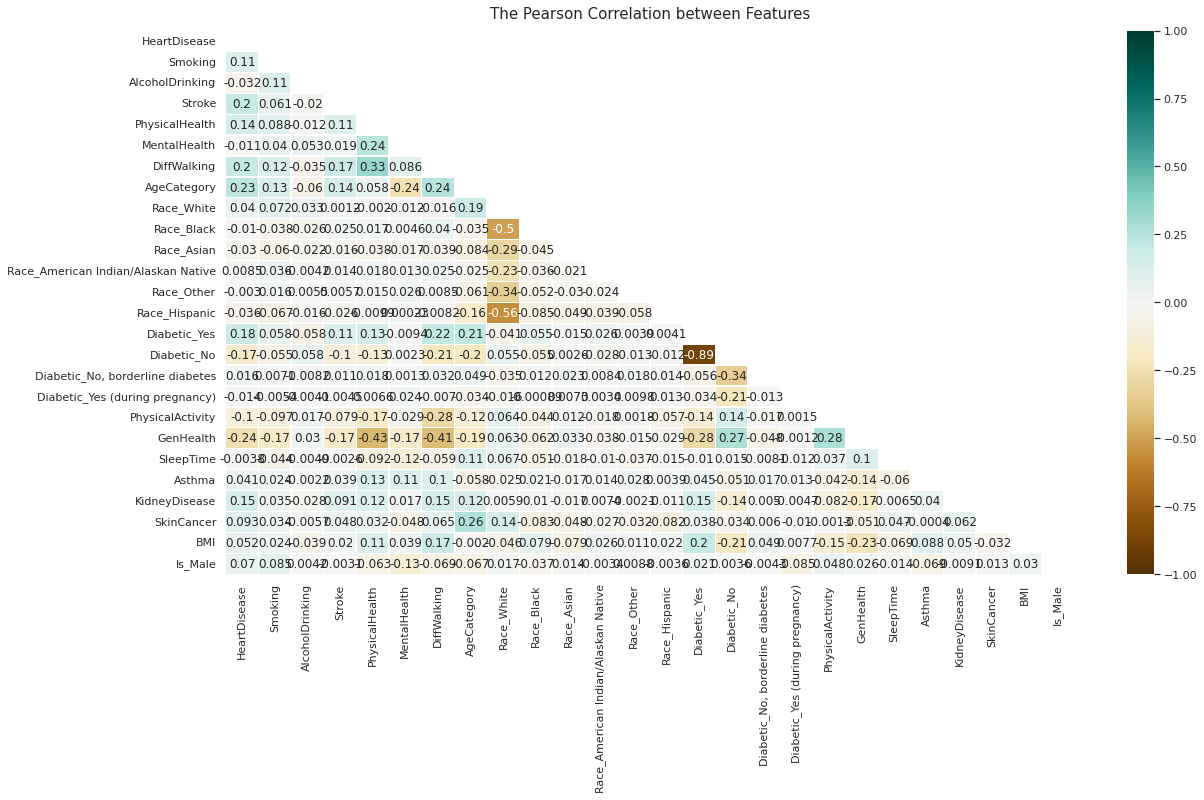

In [ ]:
data_corr = t_df.corr()
mask = np.triu(np.ones_like(t_df.corr(), dtype=bool))

corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)

plt.show()

#### Observations: 
1. There seems multicollinearity exists among some of the features like `PhysicalHealth, MentalHealth, DiffWalking` with `GenHealth`, as if teh adults are suffering with physical illness or mental illness for many days their genHealth will be poor and adults find with difficult with Walking are not very good in their health condition.
2. `DiffWalking` also has significant negative correlation with `PhysicalAcitivity`, as expected adults who are regularly doing physical activity wont find any difficulty in walking as they will be active.
3. Some of our Race features are correlated with other Race features, so lets consider only Race_white as it has high weightage compare to other race features with Target.
4. `Diabetic_Yes` and `Diabetic_No` are highly negatively correlated as both are very realted, so lets consider `Diabetic_Yes`. `Diabetic_Yes` is again correlated with GenHealth, so lets confirm the multicollinearity using VIF or OLS methods.

In [ ]:
# Selecting independent features and computing their feature weights using Pearson correlation
drop_feat = ['MentalHealth', 'PhysicalActivity', 'Race_Black', 'Race_Asian',
             "Race_American Indian/Alaskan Native", 'Race_Other', 'Race_Hispanic', 'Diabetic_No']

t_df_imp = t_df.drop(drop_feat,axis=1).copy()

data_corr = t_df_imp.corr()

fwt = pd.DataFrame(data_corr['HeartDisease'].values, columns=['FeatureWeights'])
# fwt['Features'] = data_corr['HeartDisease'].index
fwt.insert(loc=0, column='Features', value=data_corr['HeartDisease'].index)
fwt = fwt.loc[1:,:]
fwt = fwt.sort_values('FeatureWeights', ascending = False).reset_index(drop=True)
fwt

,Features,FeatureWeights
0,AgeCategory,0.233432
1,DiffWalking,0.201258
2,Stroke,0.196835
3,Diabetic_Yes,0.183072
4,KidneyDisease,0.145197
5,PhysicalHealth,0.136415
6,Smoking,0.107764
7,SkinCancer,0.093317
8,Is_Male,0.070040
9,BMI,0.052175


### Feature Importance using Pearson Correlation:

* AgeCategory, Stroke, Diabetic_yes have very positive correlation with Target where as AlcholDrinking and GenHealth are very negatively correlated with Target.
* List of Important Features -->  `['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'is_Male', 'BMI', 'Asthma', 'Race_White', 'Diabetic_No, borderline diabetes', 'SleepTime', 'Diabetic_Yes (during pregnancy)', 'AlcoholDrinking', 'GenHealth']`

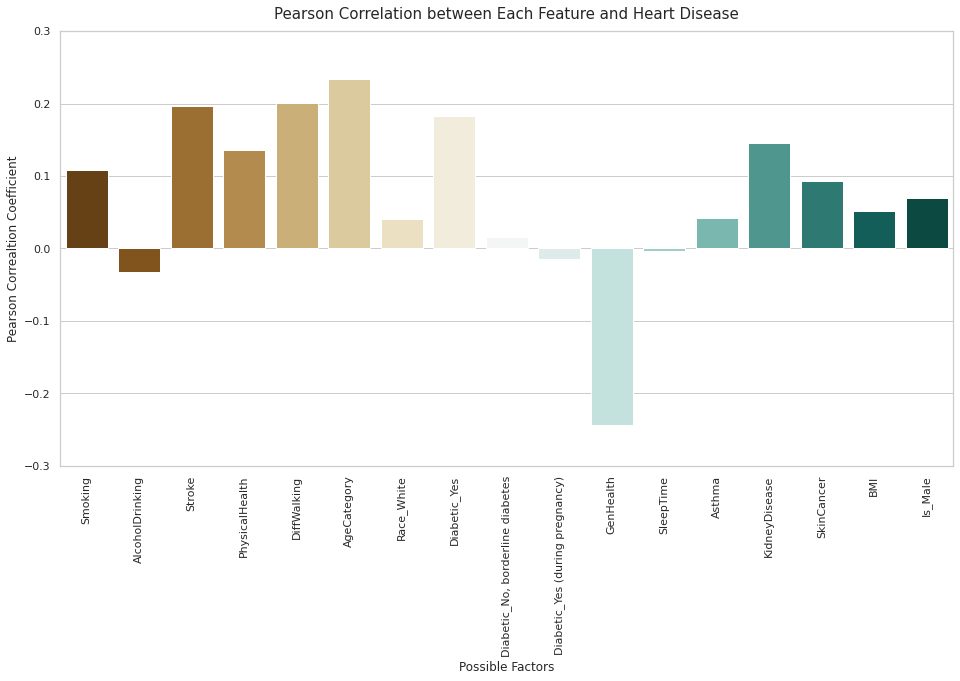

In [ ]:
corr_ft_hd_x = list(data_corr.columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(data_corr["HeartDisease"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y, palette= "BrBG")
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Possible Factors",
               ylabel= "Pearson Correaltion Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")

plt.show()

### 2. OLS Method: Let's check significant features and their weights using OLS Method.

In [ ]:
# Defining a function to calculate feature coefficients with p-values using ols method.
import statsmodels.api as sm

def cal_OLS_summary(t_df):
    col = t_df.columns.tolist()
    col.remove('HeartDisease')
    col

    model = sm.OLS(t_df['HeartDisease'], t_df[col]).fit()
    # Print out the statistics
    return model.summary()

In [ ]:
cal_OLS_summary(t_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2279.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:28:22   Log-Likelihood:                -22143.
No. Observations:              319795   AIC:                         4.433e+04
Df Residuals:                  319771   BIC:                         4.459e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Smoking                                 0.0201      0.001     20.748      0.000       0.018       0.022
AlcoholDrinking                        -0.0155      0.002     -8.386      0.000      -0.019      -0.012
Stroke                                  0.1835      0.002     74.110      0.000       0.179       0.188
PhysicalHealth                          0.0237      0.002     13.255      0.000       0.020       0.027
MentalHealth                           -0.0012      0.002     -0.648      0.517      -0.005       0.002
DiffWalking                             0.0466      0.002     29.956      0.000       0.044       0.050
AgeCategory                             0.0113      0.000     74.149      0.000       0.011       0.012
Race_White                              0.0296      0.002     18.184      0.000       0.026       0.033
Race_Black                              0.0104      0.002      4.966      0.000       0.006       0.015
Race_Asian                              0.0174      0.003      5.994      0.000       0.012       0.023
Race_American Indian/Alaskan Native     0.0294      0.004      8.314      0.000       0.022       0.036
Race_Other                              0.0291      0.003     11.007      0.000       0.024       0.034
Race_Hispanic                           0.0204      0.002     10.448      0.000       0.017       0.024
Diabetic_Yes                            0.0777      0.002     33.744      0.000       0.073       0.082
Diabetic_No                             0.0143      0.002      7.236      0.000       0.010       0.018
Diabetic_No, borderline diabetes        0.0225      0.003      6.548      0.000       0.016       0.029
Diabetic_Yes (during pregnancy)         0.0219      0.005      4.425      0.000       0.012       0.032
PhysicalActivity                       -0.0029      0.001     -2.490      0.013      -0.005      -0.001
GenHealth                              -0.0328      0.001    -59.674      0.000      -0.034      -0.032
SleepTime                               0.0022      0.003      0.709      0.478      -0.004       0.008
Asthma                                  0.0159      0.001     11.545      0.000       0.013       0.019
KidneyDisease                           0.1015      0.003     40.498      0.000       0.097       0.106
SkinCancer                              0.0249      0.002     15.140      0.000       0.022       0.028
BMI                                    -0.0033      0.000     -7.827      0.000      -0.004      -0.002
Is_Male                                 0.0482      0.001     50.910      0.000       0.046       0.050
==============================================================================
Omnibus:                   150879.432   Durbin-Watson:                   1.997
Prob(Omnibus)

### Note:
Even OLS results confirms the multicollinearity among the features, so lets select same features as we selected using Pearson correlation and check for collinearity.

In [ ]:
cal_OLS_summary(t_df_imp)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.214
Model:                            OLS   Adj. R-squared (uncentered):              0.214
Method:                 Least Squares   F-statistic:                              5120.
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:28:22   Log-Likelihood:                         -22231.
No. Observations:              319795   AIC:                                  4.450e+04
Df Residuals:                  319778   BIC:                                  4.468e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Smoking                              0.0222      0.001     23.216      0.000       0.020       0.024
AlcoholDrinking                     -0.0144      0.002     -7.849      0.000      -0.018      -0.011
Stroke                               0.1844      0.002     74.495      0.000       0.180       0.189
PhysicalHealth                       0.0294      0.002     17.451      0.000       0.026       0.033
DiffWalking                          0.0489      0.002     31.914      0.000       0.046       0.052
AgeCategory                          0.0118      0.000     83.376      0.000       0.011       0.012
Race_White                           0.0126      0.001     11.387      0.000       0.010       0.015
Diabetic_Yes                         0.0641      0.001     42.951      0.000       0.061       0.067
Diabetic_No, borderline diabetes     0.0092      0.003      2.880      0.004       0.003       0.016
Diabetic_Yes (during pregnancy)      0.0105      0.005      2.038      0.042       0.000       0.021
GenHealth                           -0.0293      0.000    -68.257      0.000      -0.030      -0.028
SleepTime                            0.0193      0.003      7.334      0.000       0.014       0.024
Asthma                               0.0179      0.001     13.081      0.000       0.015       0.021
KidneyDisease                        0.1026      0.003     40.941      0.000       0.098       0.108
SkinCancer                           0.0242      0.002     14.709      0.000       0.021       0.027
BMI                                 -0.0014      0.000     -3.633      0.000      -0.002      -0.001
Is_Male                              0.0502      0.001     54.404      0.000       0.048       0.052
==============================================================================
Omnibus:                   150418.098   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           684407.730
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                       8.378   Cond. No.                         91.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Points to Consider:
Selected features do not have the multicollinearity among the features and OLS results confirms it.

* As we are trying to predict the Heart Disease and it is a critical case, I am assuming my significance level as 1% (p=0.01 as threshold).
* All the selected features are `significant` except `Diabetic_Yes (during pregnancy)`.

* List of Important Features -->  `['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'is_Male', 'BMI', 'Asthma', 'Race_White', 'Diabetic_No, borderline diabetes', 'SleepTime',  'AlcoholDrinking', 'GenHealth']`

### 3. Permutation Importance : Let's calculate Feature weights using Permutation Importance.

In [ ]:
# !pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 11.9 MB/s 
     |████████████████████████████████| 133 kB 44.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e82003bd0dcaf28f7928071894d5e9b35201bb7be3670d10d535af81f2467199
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
# Define own function to calculate PermutationImportance of given data

from sklearn.model_selection import  train_test_split
import eli5
from eli5.sklearn import PermutationImportance

def cal_PermutationImportance_df(t_df):
    feat = t_df.columns.tolist()
    feat.remove('HeartDisease')
    X = t_df[feat].copy()
    y = t_df['HeartDisease']
    #Spliting data into Training 75%,  Test set 10% and Validation set 15%.

    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    
    # Create linear regression object
#     model = linear_model.LogisticRegression()
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)

    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())

In [ ]:
imp_feats_to_check = ["HeartDisease", 'AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']

cal_PermutationImportance_df(t_df_imp[imp_feats_to_check])

Weight,Feature
0.0477 ± 0.0022,GenHealth
0.0474 ± 0.0027,AgeCategory
0.0331 ± 0.0027,Stroke
0.0132 ± 0.0019,Is_Male
0.0127 ± 0.0013,Diabetic_Yes
0.0115 ± 0.0019,KidneyDisease
0.0033 ± 0.0008,Smoking
0.0010 ± 0.0006,SkinCancer
0.0010 ± 0.0004,Asthma
0.0005 ± 0.0001,AlcoholDrinking


### Is the predictor variables independent of all the other predictor variables?

##### Observations: 
1. There seems multicollinearity exists among some of the features like `PhysicalHealth, MentalHealth, DiffWalking` with `GenHealth`, as if teh adults are suffering with physical illness or mental illness for many days their genHealth will be poor and adults find with difficult with Walking are not very good in their health condition.
2. `DiffWalking` also has significant negative correlation with `PhysicalAcitivity`, as expected adults who are regularly doing physical activity wont find any difficulty in walking as they will be active.
3. Some of our Race features are correlated with other Race features, so lets consider only Race_white as it has high weightage compare to other race features with Target.
4. `Diabetic_Yes` and `Diabetic_No` are highly negatively correlated as both are very realted, so lets consider `Diabetic_Yes`. `Diabetic_Yes` is again correlated with GenHealth, so lets confirm the multicollinearity using VIF or OLS methods.

* Feature Importance of PermutationImportance aligns with above 2 methods (Pearson Correlation weightage and OLS Method), As excpected AgeCategory, GenHealth, Stroke, Diabets plays significant role to identify HeartDisease.

* `SleepTime, Diabetic During Pregnancy and Borderline Diabetes` are `not having any significant importance` with any of above tried 3 methods, it is `better to drop them`.

* Final List of Selected Important Features/Variables which are independent of each other -->  `['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']`

### Which independent variables are useful to predict a target (dependent variable)?
* Below list of Selected Important Features/Variables are independent of each other and have significance importance for each feature to predict HeartDisease. 
* `['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']`
* We also checked the multicollinearity of these features using VarianceInfliationFactor and it confirms that there are no dependent features among above selected features.

In [ ]:
imp_feats = ['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']
print(f"Checking % Missing Data in Important Features:\n{100*t_df_imp[imp_feats].isnull().sum()/t_df_imp.shape[0]}")

Checking % Missing Data in Important Features:
AgeCategory        0.0
Stroke             0.0
Diabetic_Yes       0.0
KidneyDisease      0.0
Smoking            0.0
SkinCancer         0.0
Is_Male            0.0
BMI                0.0
Asthma             0.0
Race_White         0.0
AlcoholDrinking    0.0
GenHealth          0.0
dtype: float64


### Lets check the multicollinearity using Variance Inflation Factor (VIF) on above selected features

In [ ]:
# load statmodels functions to calculate variance_inflation_factor -- to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif.sort_values('VIF',inplace=True,ascending=False)
    return(vif)

In [ ]:
t_df_imp.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Race_White,Diabetic_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,0,1,0,0,0.600000,0,7,1.0,1.0,0.0,0.0,3,0.250,1,0,1,0,0
1,0,0,0,1,0.000000,0,12,1.0,0.0,0.0,0.0,3,0.500,0,0,0,1,0
2,0,1,0,0,0.674342,0,9,1.0,1.0,0.0,0.0,1,0.625,1,0,0,2,1
3,0,0,0,0,0.000000,0,11,1.0,0.0,0.0,0.0,2,0.375,0,0,1,1,0
4,0,0,0,0,0.674342,1,4,1.0,0.0,0.0,0.0,3,0.625,0,0,0,1,0


In [ ]:
imp_feats = ['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 
             'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']

calc_vif(t_df_imp[imp_feats])

,variables,VIF
0,AgeCategory,4.461473
11,GenHealth,4.435149
9,Race_White,4.320069
7,BMI,3.694353
6,Is_Male,1.891697
4,Smoking,1.769483
2,Diabetic_Yes,1.329578
5,SkinCancer,1.198432
8,Asthma,1.163536
10,AlcoholDrinking,1.095492


#### Note: All the features VIF scores are under 5, so we do not have any multi collinear features.

### Which predictor variables are the most important?
* `['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'is_Male', 'BMI', 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']` these features are independent of each other and have significance importance in identifying HeartDisease.

# <b>5 <span style='color:#0386f7de'>|</span> Model Building</b>

* We have cleaned, proceesed, Transformed our Data and found important features to predict Heart Disease. We are in the final stage, lets build a model and check the model performance.

In [ ]:
# Using Startified Sampling to split into test, train sets
from sklearn.model_selection import StratifiedShuffleSplit

selected_feats = ['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 
             'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']
final_df = t_df_imp.copy()


X = final_df[selected_feats].copy()
y = final_df['HeartDisease'].copy()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
    
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

print('Checking the stratified split...\n')
print('\nTarget proportion in original dataset:')
print(100*df['HeartDisease'].value_counts(normalize=True))

print('\nTarget proportion in Train dataset:')
print(100*y_train.value_counts(normalize=True))

print('\nTarget proportion in Test dataset:')
print(100*y_test.value_counts(normalize=True))

Checking the stratified split...


Target proportion in original dataset:
No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

Target proportion in Train dataset:
0    91.440341
1     8.559659
Name: HeartDisease, dtype: float64

Target proportion in Test dataset:
0    91.440794
1     8.559206
Name: HeartDisease, dtype: float64


#### Stratified Sampling is a sampling method that reduces the sampling error and it allows to create a test set with a population that best represents the entire population being studied.
* As we can see that Tain and Test sets have same Target distribution.

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')
print(f'Precission_score: {precision_score(y_test,lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test,lr_y_predict)}')
print(f'F1-score: {f1_score(y_test,lr_y_predict)}')

model: LogisticRegression(random_state=0)
Accuracy_score: 0.9161465434214312
Precission_score: 0.5516728624535316
Recall_score: 0.10843197428028642
F1-score: 0.18124084025403028


### Accuracy of the current model is very good but the precision and Recall are very bad, as our data is unbalanced. Let's do oversampling and build another model.

In [ ]:
final_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Race_White,Diabetic_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI,Is_Male
0,0,1,0,0,0.600000,0,7,1.0,1.0,0.0,0.0,3,0.250,1,0,1,0,0
1,0,0,0,1,0.000000,0,12,1.0,0.0,0.0,0.0,3,0.500,0,0,0,1,0
2,0,1,0,0,0.674342,0,9,1.0,1.0,0.0,0.0,1,0.625,1,0,0,2,1
3,0,0,0,0,0.000000,0,11,1.0,0.0,0.0,0.0,2,0.375,0,0,1,1,0
4,0,0,0,0,0.674342,1,4,1.0,0.0,0.0,0.0,3,0.625,0,0,0,1,0


### OverSampling: Balancing the each class distribution to build a robust model.

In [ ]:
# OverSampling our Target and creating a new dataframe

class_0 = t_df_imp[t_df_imp['HeartDisease'] == 0]
class_1 = t_df_imp[t_df_imp['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
balanced_df = pd.concat([class_0, class_1], axis=0)
print('OverSampled Data Distribution:\n',balanced_df['HeartDisease'].value_counts())

OverSampled Data Distribution:
 0    292422
1    292422
Name: HeartDisease, dtype: int64


In [ ]:
balanced_df[['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 
                 'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']].head()

,AgeCategory,Stroke,Diabetic_Yes,KidneyDisease,Smoking,SkinCancer,Is_Male,BMI,Asthma,Race_White,AlcoholDrinking,GenHealth
0,7,0,1.0,0,1,1,0,0,1,1.0,0,3
1,12,1,0.0,0,0,0,0,1,0,1.0,0,3
2,9,0,1.0,0,1,0,1,2,1,1.0,0,1
3,11,0,0.0,0,0,1,0,1,0,1.0,0,2
4,4,0,0.0,0,0,0,0,1,0,1.0,0,3


In [ ]:
# Lets Split the data using Stratification 
from sklearn.model_selection import train_test_split

selected_feats = ['AgeCategory', 'Stroke', 'Diabetic_Yes', 'KidneyDisease', 'Smoking', 'SkinCancer', 'Is_Male', 'BMI', 
             'Asthma', 'Race_White', 'AlcoholDrinking', 'GenHealth']

X = balanced_df[selected_feats].copy()
y = balanced_df['HeartDisease'].copy()

# Creating Test(75%), Train(15%), Validation(10%) sets
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t,  test_size=0.10)

print('Checking the Data Distribution by stratified split...')
print('\nTarget proportion in original dataset:')
print(100*balanced_df['HeartDisease'].value_counts(normalize=True))

print('\nTarget proportion in Train dataset:')
print(100*y_train.value_counts(normalize=True))

print('\nTarget proportion in Test dataset:')
print(100*y_test.value_counts(normalize=True))

Checking the Data Distribution by stratified split...

Target proportion in original dataset:
0    50.0
1    50.0
Name: HeartDisease, dtype: float64

Target proportion in Train dataset:
0    50.038556
1    49.961444
Name: HeartDisease, dtype: float64

Target proportion in Test dataset:
1    50.211451
0    49.788549
Name: HeartDisease, dtype: float64


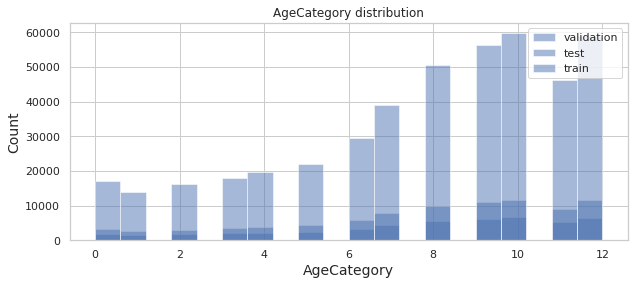

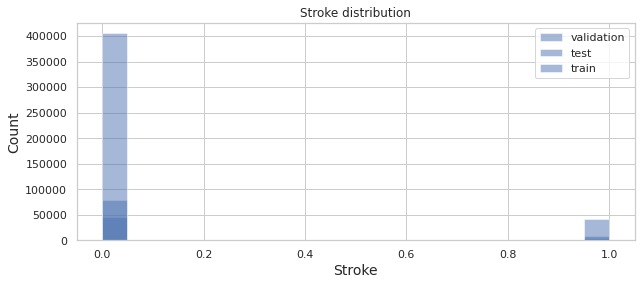

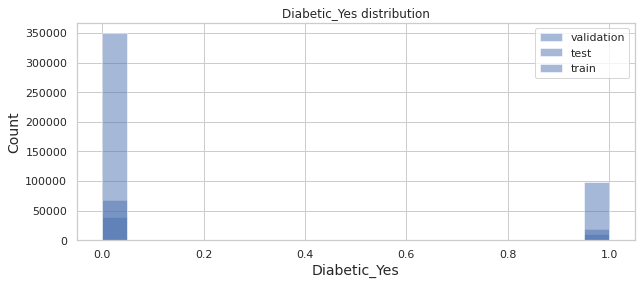

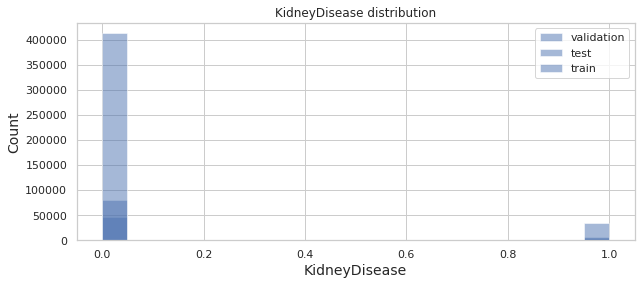

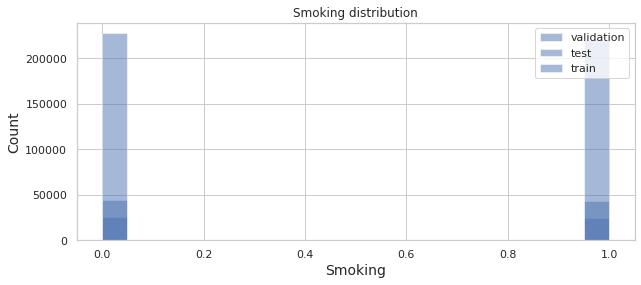

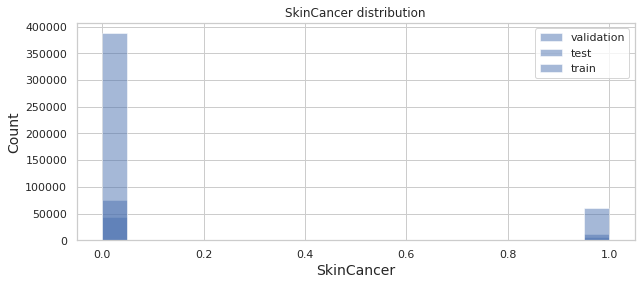

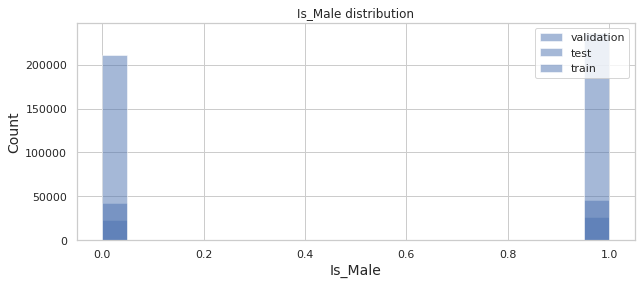

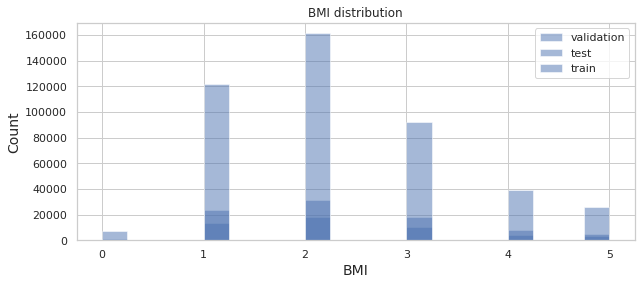

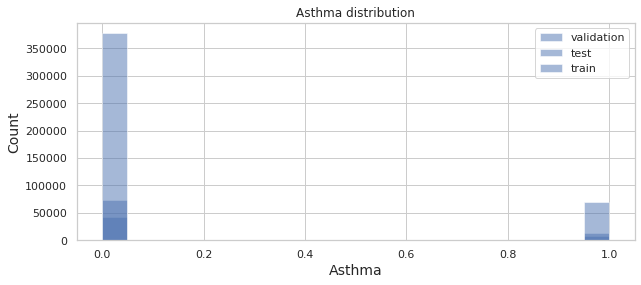

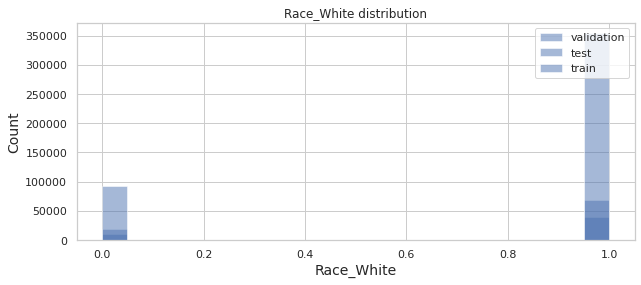

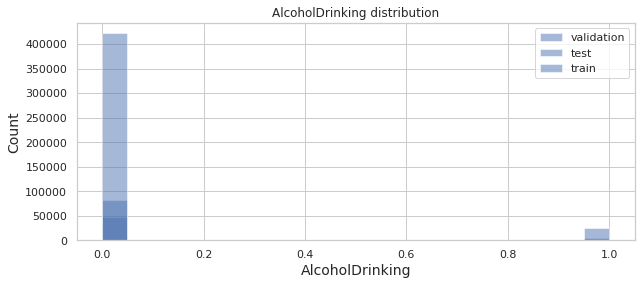

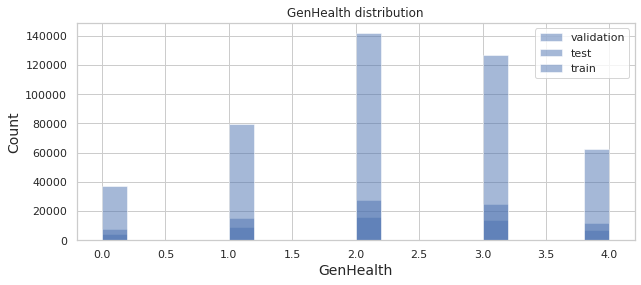

In [ ]:
# check the feature wise distribution by Test, Train, Validation Sets
for col in X_test.columns[:]:
    plt.figure(figsize=(10,4))
    plt.hist(X_val[col], bins=20, alpha=0.5, label="validation", color='b')
    plt.hist(X_test[col], bins=20, alpha=0.5, label="test", color='b')
    plt.hist(X_train[col], bins=20, alpha=0.5, label="train", color='b')
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(col))
    plt.show()

#### Do the training and test sets have the same data?


##### Above graphs shows the distribution by sets [Test, Train, Validation]
* Yes!, all the important features in Test and Validation sets are following same distribution as Train set.

<----------- Model Performance with Test set ----------->
model: LogisticRegression(random_state=0)
Accuracy_score: 0.7648614451651145
Precission_score: 0.7592826303553637
Recall_score: 0.7785193761492883
F1-score: 0.7687806846459075


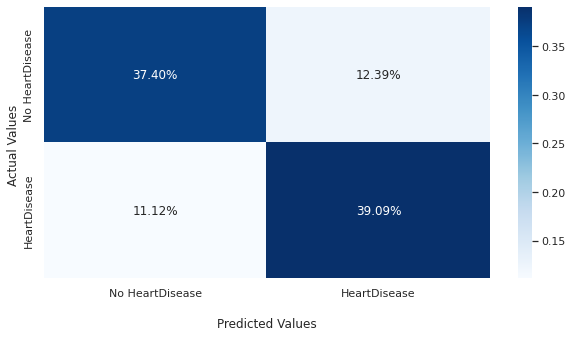

In [ ]:
# lets build a Logistic Model and check the model performance with Test and Validation Sets.
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print("<----------- Model Performance with Test set ----------->")
print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')
print(f'Precission_score: {precision_score(y_test,lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test,lr_y_predict)}')
print(f'F1-score: {f1_score(y_test,lr_y_predict)}')



cm = confusion_matrix(y_test,lr_y_predict)
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()


<----------- Model Performance with Validation set ----------->
model: LogisticRegression(random_state=0)
Accuracy_score: 0.7601987447698745
Precission_score: 0.7515769799859824
Recall_score: 0.7769593044318319
F1-score: 0.7640573973280554
--------------------------------------------------------------
Model AUC Score on Training Data: 0.8394352475081133
Model AUC Score on Test Data: 0.8415227244377544
Model AUC Score on Validation Data: 0.8374329022620576


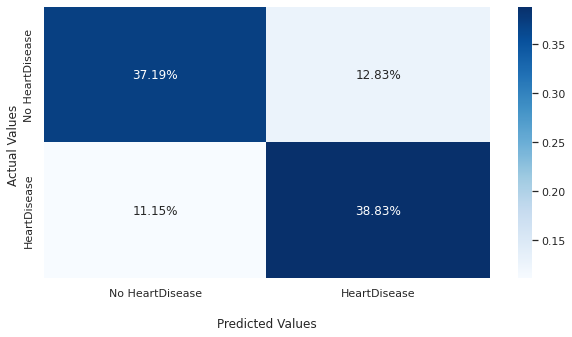

In [ ]:

# Make predictions using the validation set
y_val_pred = lr.predict(X_val)
print("\n<----------- Model Performance with Validation set ----------->")
print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_val,y_val_pred)}')
print(f'Precission_score: {precision_score(y_val,y_val_pred)}')
print(f'Recall_score: {recall_score(y_val,y_val_pred)}')
print(f'F1-score: {f1_score(y_val,y_val_pred)}')
print("--------------------------------------------------------------")
print(f"Model AUC Score on Training Data: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"Model AUC Score on Test Data: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")
print(f"Model AUC Score on Validation Data: {roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])}")

# Plot Confusion Matrix
cm = confusion_matrix(y_val,y_val_pred)
plt.figure(figsize=(10,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
plt.show()

### Logistic Model Performance is very stable across all the sets (`Test and Valiadtion` sets) and the scores are very close among all the metrics like `Accuracy, Precision, Recall`.
* After `OverSampling, the model performance boosted` and the `scores are very stable` when we checked with Validation set as well, This seems to be a `very good and stable model to predict HeartDisease` as the model performed very well on validation set aswell.

## Lets try Tree Based Model to find a better model - Random Forest 

In [ ]:
# Using some hyperparameters to find the best model in RandomForestClassifier
forest = RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0)

In [ ]:
print(f"Model Score on Training Data: {forest.score(X_train,y_train)}")
print(f"Model Score on Test Data: {forest.score(X_test,y_test)}")
print(f"Model Score on Validation Data: {forest.score(X_val, y_val)}")
print("--------------------------------------------------------------")
print(f"Model AUC Score on Training Data: {roc_auc_score(y_train, forest.predict_proba(X_train)[:,1])}")
print(f"Model AUC Score on Test Data: {roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])}")
print(f"Model AUC Score on Validation Data: {roc_auc_score(y_val, forest.predict_proba(X_val)[:,1])}")

Model Score on Training Data: 0.7700204512689844
Model Score on Test Data: 0.7721340066342175
Model Score on Validation Data: 0.7660122304473769
--------------------------------------------------------------
Model AUC Score on Training Data: 0.8488910911746683
Model AUC Score on Test Data: 0.849227178447278
Model AUC Score on Validation Data: 0.8443939452083666


#### Model Performance is very stable across all the sets (`Train, Test and Valiadtion` sets)
* This is the best model so far compare to Logistic as we can see the RandomForest model AUC score is ~85% where as Logistic model AUC score is just 83%.
* Morever RandomForest model performance is pretty stable compare to Logistic model on every dataset like (Train, Test and Validation).
* Based on the above performance, selecting the RandomForestClassifier Model.

<BarContainer object of 12 artists>

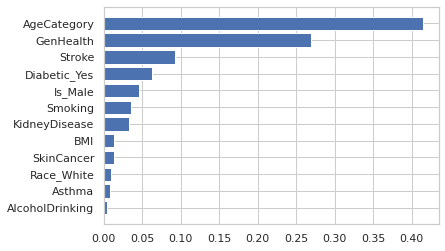

In [ ]:
sorted_idx = forest.feature_importances_.argsort()
features = X_train.columns.tolist()
result = sorted(zip(features, forest.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

## Observations:

* Above charts shows the variable important in descending order.
* Age category, General health, Diabetic_YES, Stroke and KidneyDisease are the significant important features to predict the Heart Disease.
* It is strange that `BMI` is `not` among the `TOP important features`.
* If closely observed, `Health related issues like Diabetic, Stroke, Kidney Disease` are the very important features and people suffered with such issues have high chances of getting heart Disease followed by `AGE, Gender and Smoking`.
* Let's try to understand the behaviour using the Shap Values.

#### Above Feature Importance are almost as same the feature importance obtained from the Permutatution Importance order.

##### Pickling the above developed RandomForest Model to predict Heart Disease and use this Pickle file in Streamlit to run the App.

In [ ]:
# Lets pickle the model to make use in UI
import pickle
filename = "rf_model_to_predict_heartDisease"
pickle.dump(forest, open(filename, "wb"))

In [ ]:
!pip install shap

## Model Interpretability using SHAP:

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(forest)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

## Observations on SHAP values:

* As expected, with `increase in Age`, the `chances of getting HeartDisease are also High` compare to younger people
* GenHealth `(General Health) shows very realastic trend` that if `someones general health is poor/bad`, they are `high prone to Heart Disease`
* `Male_Gender, Smoking, BMI, Asthma` follows the same trend, if they are `Male / have smoking habit / has high BMI value / has Asthma problem`, they are `highly prone` to diagonsed with Heart Disease.
* `Stroke` & `KidneyDisease` shows realastic trend that If someone suffered with Stroke / KideneyDisease in the past has high chances of getting Heart Disease.
* It is `interesting behaviour about AlcholDrinking habit`, irrespective of `whether one drink or not`, `few cannot escape from diagnosed` with Heart Disease.
* As we infered from model feature importance, if `someone is facing critical Health issues` then they are `highly prone to HeartDisease`.
#### All these observations are algined with the above RandomForest model variable importance.

### Overall Conclusion:
* Above Dataset We have both numerical and categorical features and the numerical features have very extreme outliers.
* There are no missing data in the dataset, so no missing imputation required.
* I have used IQR method to impute outliers of numerical features and imputed with mean as most of the features median is 0 but positively skewed, so I assumed imputing outliers with Mean make sense than imputing with ZERO.
* As the scales are different for each feature, I Normalized the data to bring down all the features to same scale.
* As BMI_values are not seems to be making as their is no significant difference between adults with or without Heart Disease eventhough the BMI is very High, so I have created a BMI class which showed more realistic distribution.
* I have used Encoders to change Categorical features to Numeric values.
* I have used OLS, Pearson correlation, PermutationImportance to find important features to identify Heart Disease.
* Data has multicollinear features, I have used Pearson correlation and Variance Inflation Factor (VIF) to remove multicolinear features from the predictors.
* As the data is unbalanced, I used Oversampling technique to imporve my Target distribution. 
* OverSampling improved my performance of the model and I have used Logistic Regression model to build a stable model to predict Heart Disease.
* Tried Random Forest model and the AUC scores, and Model Performance Metrics are very good and very stable across test and validation sets, this shows the stability of the model to identify Heart Disease.

* As expected, with `increase in Age`, the `chances of getting HeartDisease are also High` compare to younger people
* GenHealth `(General Health) shows very realastic trend` that if `someones general health is poor/bad`, they are `high prone to Heart Disease`
* `Male_Gender, Smoking, BMI, Asthma` follows the same trend, if they are `Male / have smoking habit / has high BMI value / has Asthma problem`, they are `highly prone` to diagonsed with Heart Disease.
* `Stroke` & `KidneyDisease` shows realastic trend that If someone suffered with Stroke / KideneyDisease in the past has high chances of getting Heart Disease.
* It is `interesting behaviour about AlcholDrinking habit`, irrespective of `whether one drink or not`, `few cannot escape from diagnosed` with Heart Disease.
* As we infered from model feature importance, if `someone is facing critical Health issues` then they are `highly prone to HeartDisease`.
#### All these observations are algined with the above RandomForest model variable importance.

### Refernces:
1. Scikit learn Documentation
2. Referred Medium Articles
3. Referred Analytics Vidhya Articles
4. Referred Towards Data Science Articles
5. Referred Kaggle Notebooks.
6. https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glm_h2oworld_demo.ipynb
7.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.census.labor.violations.ipynb
8.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.census.labor.violations.ipynb
9.https://github.com/aiskunks/Skunks_Skool/blob/main/H2O_AutoML_IPYNB/glrm.walking.gait.ipynb
10. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
11.https://github.com/aiskunks/Skunks_Skool/tree/main/I2SL
12. permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
13. modeling is refered from scikit-learn logistic regression officiakl documentatio
14. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
15. Refered Kaggle contributions for oversampling
16. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
17. Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

**I have used python libraries to do I have developed my own functions to plot the charts, to compute required metrics, to calculate required information and Every single line of code was written by myself and not copied from anywhere. for Data Exploration, I have referred to few Towards Data Science, Kaggle, Analytics vidya articles and have developed my knowledge from it. For Feature Scaling, I rerferred to Analytics Vidya article to understand more about encoders.**

### Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.